In [0]:
#Name: Shreyas Patil
#USC ID Number: 3220932311
#USC Email: shreyasp@usc.edu
#Submission Date: 4/7/2019

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
use_cuda = True
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

In [0]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=25, shuffle=True, num_workers=6)

testloader = torch.utils.data.DataLoader(testset, batch_size=25, shuffle=False, num_workers=6)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x 
network = Net()

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.9)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


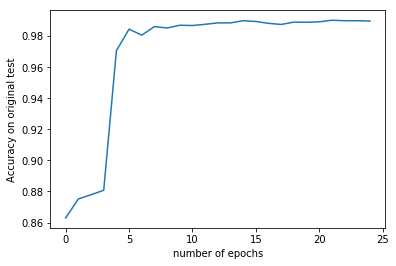

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
network = network.to(device)
accuracy11 = []
accuracy12 = []
pred = []
lab = []
for epoch in range(25):
    total1 = 0
    correct1 = 0
    total2 = 0
    correct2 = 0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()           #Calculating the gradients
        optimizer.step()     #Updates the parameters
        
    for testdata in testloader:
        data, labels = testdata
        data, labels = data.to(device), labels.to(device)
        outputs = network(data)
        _, predicted = torch.max(outputs, 1)
        total1 += labels.size(0)
        correct1 += (predicted == labels).sum().item()    
        pred.append(predicted.reshape(-1, 1))
        lab.append(labels.reshape(-1, 1))
      
    
    accuracy11.append(correct1 / total1)
        
    
plt.plot(range(25), accuracy11) 
plt.xlabel("number of epochs")
plt.ylabel("Accuracy on original test")
plt.show()
       

In [8]:
correct = 0
total = 0
pred = []
lab = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        pred.append(predicted.reshape(-1, 1))
        lab.append(labels.reshape(-1, 1))
      
pred = np.vstack(pred)
lab = np.vstack(lab)
confusion_test = confusion_matrix(lab, pred)

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 10000 test images: 98 %


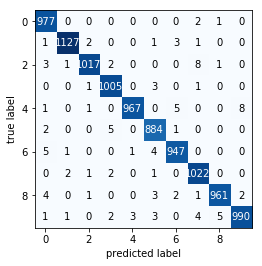

In [9]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_test)
plt.show()

In [12]:
correct = 0
total = 0
pred = []
lab = []
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        pred.append(predicted.reshape(-1, 1))
        lab.append(labels.reshape(-1, 1))
      
pred = np.vstack(pred)
lab = np.vstack(lab)
confusion_train = confusion_matrix(lab, pred)

print('Accuracy of the network on the 60000 test images: %d %%' % (
    100 * correct / total))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 60000 test images: 99 %


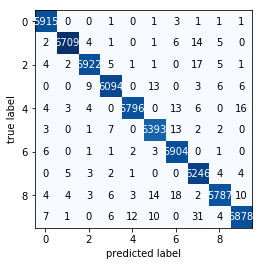

In [13]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_train)
plt.show()